In [1]:
using Plots
theme(:dark)

In [2]:
using Distributions

# zad 1

## Rozkład wykładniczy

$$F_X(t)=1-e^{-\frac{1}{\lambda} x}$$
więc
$$ F_X^{-1}(t) = -\lambda\ln(1-t) $$

In [3]:
f(x,lambda)=-log(1-x)*lambda

f (generic function with 1 method)

In [4]:
lambda=2
lambda=1/lambda

0.5

In [9]:
X=Exponential(1/lambda)

Exponential{Float64}(θ=2.0)

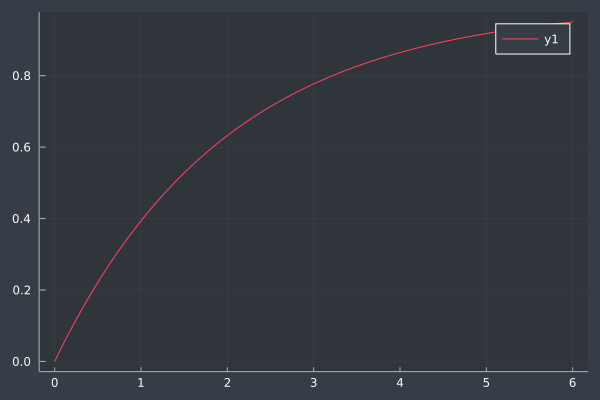

In [7]:
plot(0:0.01:6,[cdf(X, i) for i in 0:0.01:6])

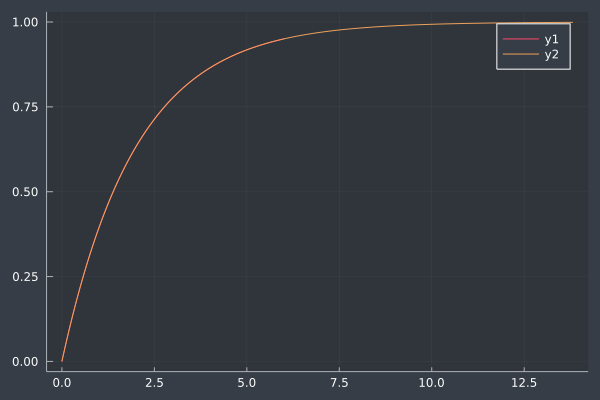

In [8]:
plot!([f(x, 1/lambda) for x in 0:0.001:1],0:0.001:1)

In [10]:
maximum(abs(f(x,1/lambda)-quantile(X,x)) for x in 0:0.01:0.99)

2.220446049250313e-16

10-element Vector{Float64}:
 0.22782046344067905
 0.4478216820007013
 0.20233755525629563
 0.17822096334329376
 0.593517176375073
 0.353327712726838
 0.6241395768346122
 3.714625816702584
 0.7411948460686177
 0.32026360148827265

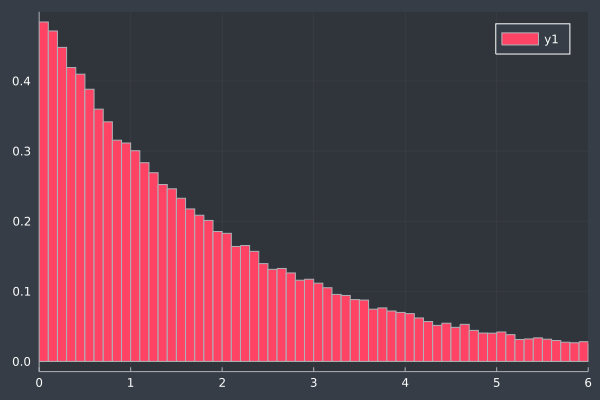

In [42]:
histogram(rand(X,10^5), normed=true, xlims=(0,6))

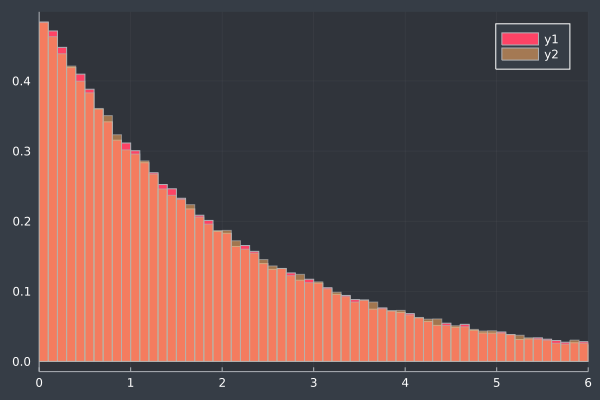

In [43]:
histogram!([f(rand(),1/lambda) for i in 1:1e5], normed=true, xlim=(0,6), opacity=0.6)

## Normalny

In [71]:
mu=2
sigma=3

3

In [72]:
Y=Normal(mu,sigma)

Normal{Float64}(μ=2.0, σ=3.0)

LoadError: MethodError: no method matching pdf(::Normal{Float64})
[0mClosest candidates are:
[0m  pdf(::Normal, [91m::Real[39m) at C:\Users\Kacper\.julia\packages\Distributions\Xrm9e\src\univariate\continuous\normal.jl:123
[0m  pdf(::UnivariateDistribution{S} where S<:ValueSupport, [91m::Real[39m) at C:\Users\Kacper\.julia\packages\Distributions\Xrm9e\src\univariates.jl:322
[0m  pdf(::UnivariateDistribution{S} where S<:ValueSupport, [91m::AbstractArray[39m) at deprecated.jl:70
[0m  ...

# Zad 2

In [1]:
using Plots
using Distributions

In [26]:
function rev(f,u,Δ)
    g(x)=0
    if f(0)>u
        g(x)=f(-x)-u
    else # g zawsze nadpisywane
        g(x)=u-f(x)
    end
    
    
    x=0
    while g(x)>0
        x+=1
#        if g(x)>1e6
#            return false
#        end
    end
    x-=1
    while g(x)>0
        x+=Δ
    end
    return f(0)>u ? -x : x
end

rev (generic function with 1 method)

In [27]:
function rev2(f,u,Δ)
    g(x)=f(x)-u
    if f(0)>u
        x=0
        while g(x)>0
            x-=1
        end
        x+=1
        while g(x)>0
            x-=Δ
        end
    else
        x=0
        while g(x)<0
            x+=1
        end
        x-=1
        while g(x)<0
            x+=Δ
        end
    end
    return x

end

rev2 (generic function with 1 method)

In [28]:
λ=2

2

In [29]:
F(x)=1-exp(-λ*x)

F (generic function with 1 method)

$$ F_X^{-1}(t) = -\lambda\ln(1-t) $$

In [30]:
Δ=1e-3

0.001

In [31]:
rev2(F,0.5123,Δ)

0.36000000000000026

In [32]:
F(ans)

0.5132477440400286

In [33]:
ans-0.5123

0.0009477440400286197

In [34]:
los=rand(100);

In [35]:
a=[rev2(F,u,Δ) for u in los];

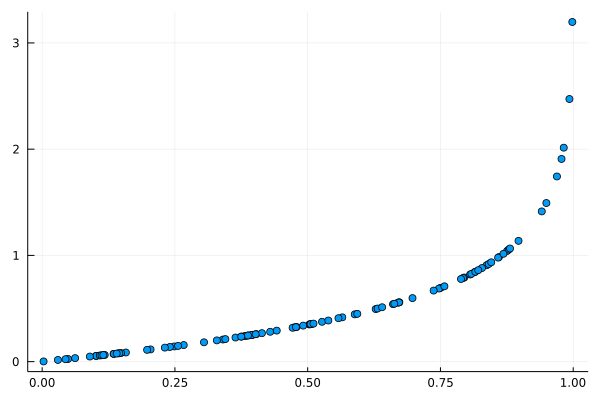

In [36]:
scatter(los,a,leg=false)

In [37]:
G(t)=-1/λ*log(1-t)

G (generic function with 1 method)

In [38]:
b=[G(u) for u in los];

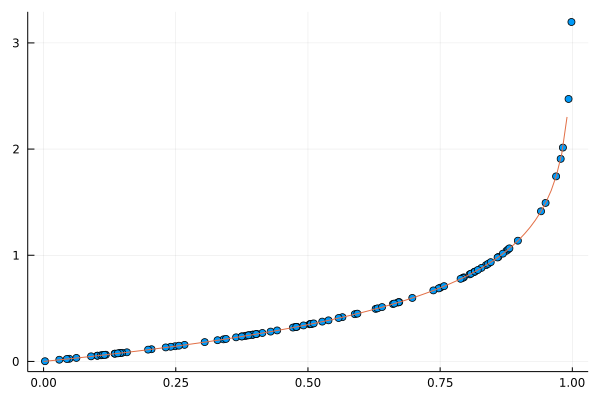

In [39]:
plot!(0:0.01:1, t->G(t))

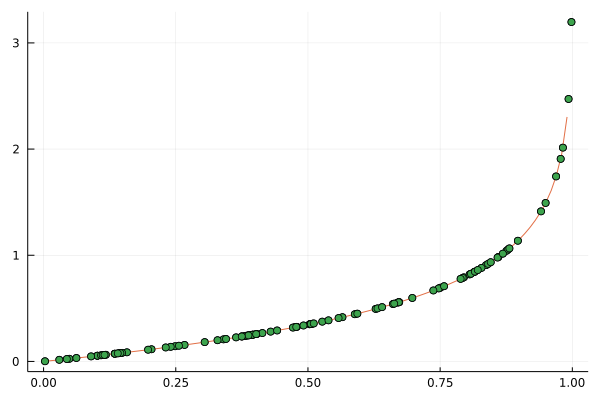

In [40]:
scatter!(los,b)

In [41]:
maximum(abs.(a-b))

0.0009867161981996497

In [42]:
Δ

0.001

In [43]:
μ=5
σ=2

2

In [44]:
X=Normal(μ, σ)

Normal{Float64}(μ=5.0, σ=2.0)

In [45]:
H(t)=cdf(X,t)

H (generic function with 1 method)

In [46]:
los=rand(100);

In [47]:
c=[rev2(H,u,Δ) for u in los];

In [100]:
d=[rev(H,u,Δ) for u in los];

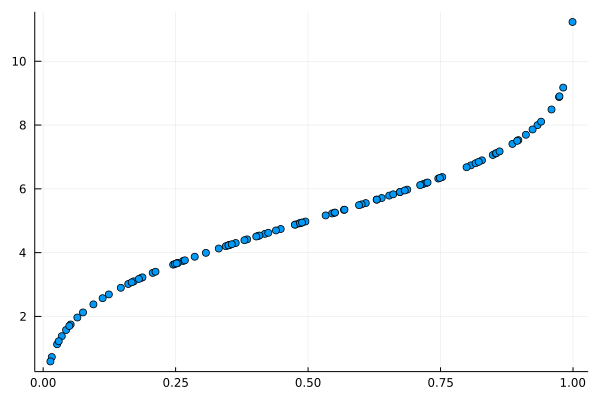

In [48]:
scatter(los,c,leg=false)

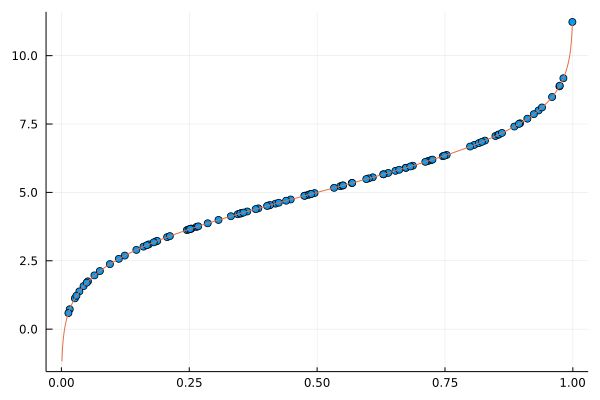

In [49]:
plot!(0:Δ:1, u-> quantile(X,u),leg=false)

In [68]:
?Normal

search: Normal NormalCanon normalize_hue NormalInverseGaussian MvNormal



```
Normal(μ,σ)
```

The *Normal distribution* with mean `μ` and standard deviation `σ≥0` has probability density function

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Note that if `σ == 0`, then the distribution is a point mass concentrated at `μ`. Though not technically a continuous distribution, it is allowed so as to account for cases where `σ` may have underflowed, and the functions are defined by taking the pointwise limit as $σ → 0$.

```julia
Normal()          # standard Normal distribution with zero mean and unit variance
Normal(mu)        # Normal distribution with mean mu and unit variance
Normal(mu, sig)   # Normal distribution with mean mu and variance sig^2

params(d)         # Get the parameters, i.e. (mu, sig)
mean(d)           # Get the mean, i.e. mu
std(d)            # Get the standard deviation, i.e. sig
```

External links

  * [Normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Normal_distribution)


In [ ]:
X=Normal()

In [67]:
?cdf

search: cdf logcdf ccdf invlogcdf logccdf logdiffcdf invlogccdf Cptrdiff_t



```
cdf(d::UnivariateDistribution, x::Real)
```

Evaluate the cumulative probability at `x`.

See also [`ccdf`](@ref), [`logcdf`](@ref), and [`logccdf`](@ref).

---

```
cdf(d::Skellam, t::Real)
```

Implementation based on SciPy: https://github.com/scipy/scipy/blob/v0.15.1/scipy/stats/*discrete*distns.py

Refer to Eqn (5) in On an Extension of the Connexion Between Poisson and χ2 Distributions, N.L Johnson(1959) Vol 46, No 3/4, doi:10.2307/2333532 It relates the Skellam and Non-central chisquare PDFs, which is very similar to their CDFs computation as well.

Computing cdf of the Skellam distribution.

---

```
cdf(d, x)
```

Calculates the CDF of the distribution. To determine the CDF, the incomplete gamma function is required. The CDF  of the Gamma distribution provides this, with the necessary 1/Γ(a) normalization.


In [50]:
Y=Geometric(1/4)

Geometric{Float64}(p=0.25)

In [51]:
K(t)=cdf(Y,t)

K (generic function with 1 method)

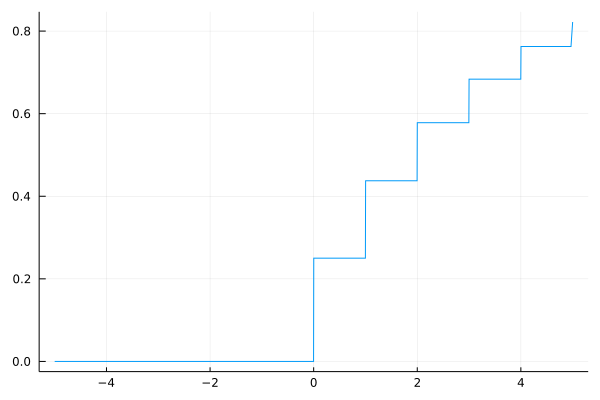

In [52]:
plot(K,leg=false)

In [53]:
d=[rev2(K,u,Δ) for u in los];

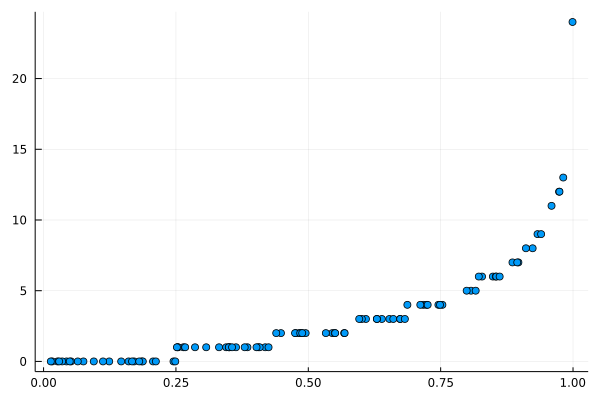

In [54]:
scatter(los,d,leg=false)

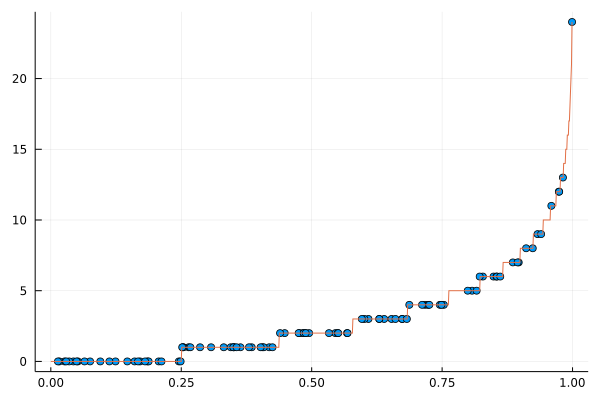

In [55]:
plot!(0:Δ:1, u -> quantile(Y,u))